In [1]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandapower as pp
import pandapower.networks as net
import pandapower.topology as top
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly
import pandapower.converter
import pandapower.estimation

pd.set_option('display.max_columns', 100)

# Power System - case39

In [2]:
net = pandapower.networks.case39()
net

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - gen (9 elements)
   - ext_grid (1 element)
   - line (35 elements)
   - trafo (11 elements)
   - poly_cost (10 elements)
   - bus_geodata (39 elements)

In [3]:
net.bus = net.bus.sort_index()
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,1,b,345.0,2.0
1,True,1.06,0.94,2,b,345.0,2.0
2,True,1.06,0.94,3,b,345.0,2.0
3,True,1.06,0.94,4,b,345.0,1.0
4,True,1.06,0.94,5,b,345.0,1.0
5,True,1.06,0.94,6,b,345.0,1.0
6,True,1.06,0.94,7,b,345.0,1.0
7,True,1.06,0.94,8,b,345.0,1.0
8,True,1.06,0.94,9,b,345.0,1.0
9,True,1.06,0.94,10,b,345.0,1.0


In [4]:
net.load = net.load.sort_index()
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,0,0.0,0.0,False,True,None,97.60,44.2,1.0,NaN,None
1,2,0.0,0.0,False,True,None,322.00,2.4,1.0,NaN,None
2,3,0.0,0.0,False,True,None,500.00,184.0,1.0,NaN,None
3,6,0.0,0.0,False,True,None,233.80,84.0,1.0,NaN,None
4,7,0.0,0.0,False,True,None,522.00,176.6,1.0,NaN,None
5,8,0.0,0.0,False,True,None,6.50,-66.6,1.0,NaN,None
6,11,0.0,0.0,False,True,None,8.53,88.0,1.0,NaN,None
7,14,0.0,0.0,False,True,None,320.00,153.0,1.0,NaN,None
8,15,0.0,0.0,False,True,None,329.00,32.3,1.0,NaN,None
9,17,0.0,0.0,False,True,None,158.00,30.0,1.0,NaN,None


In [5]:
pp.create_sgen(net, bus=1, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=11, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=14, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=21, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=23, p_mw=210, q_mvar=70, controllable=False)
pp.create_sgen(net, bus=28, p_mw=210, q_mvar=70, controllable=False)

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable
0,None,1,210.0,70.0,NaN,1.0,True,wye,True,False
1,None,11,210.0,70.0,NaN,1.0,True,wye,True,False
2,None,14,210.0,70.0,NaN,1.0,True,wye,True,False
3,None,21,210.0,70.0,NaN,1.0,True,wye,True,False
4,None,23,210.0,70.0,NaN,1.0,True,wye,True,False
5,None,28,210.0,70.0,NaN,1.0,True,wye,True,False


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,29,True,True,None,250.0,1.0,NaN,None,1.0499,False,1040.0,0.0,400.0,140.0,0.0
1,31,True,True,None,650.0,1.0,NaN,None,0.9841,False,725.0,0.0,300.0,150.0,0.0
2,32,True,True,None,632.0,1.0,NaN,None,0.9972,False,652.0,0.0,250.0,0.0,0.0
3,33,True,True,None,508.0,1.0,NaN,None,1.0123,False,508.0,0.0,167.0,0.0,0.0
4,34,True,True,None,650.0,1.0,NaN,None,1.0494,False,687.0,0.0,300.0,-100.0,0.0
5,35,True,True,None,560.0,1.0,NaN,None,1.0636,False,580.0,0.0,240.0,0.0,0.0
6,36,True,True,None,540.0,1.0,NaN,None,1.0275,False,564.0,0.0,250.0,0.0,0.0
7,37,True,True,None,830.0,1.0,NaN,None,1.0265,False,865.0,0.0,300.0,-150.0,0.0
8,38,True,True,None,1000.0,1.0,NaN,None,1.0300,False,1100.0,0.0,300.0,-100.0,0.0


In [7]:
net.ext_grid 

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar,slack_weight
0,30,True,None,0.0,0.982,646.0,0.0,300.0,-100.0,1.0


In [8]:
net.line = net.line.sort_index()
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,1557.117675,1.0,0,0.0,True,1.0,1.004087,100.0,None,1,4.165875,None,1,ol,48.919275
1,1671.444477,1.0,0,0.0,True,1.0,1.673479,100.0,None,1,1.190250,None,38,ol,29.756250
2,573.194026,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,2,ol,17.972775
3,325.374525,1.0,1,0.0,True,1.0,0.836740,100.0,None,1,8.331750,None,24,ol,10.236150
4,493.410410,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.547325,None,3,ol,25.352325
5,476.473106,1.0,2,0.0,True,1.0,0.836740,100.0,None,1,1.309275,None,17,ol,15.830325
6,299.077132,1.0,3,0.0,True,1.0,1.004087,100.0,None,1,0.952200,None,4,ol,15.235200
7,307.991502,1.0,3,0.0,True,1.0,0.836740,100.0,None,1,0.952200,None,13,ol,15.354225
8,96.720920,1.0,4,0.0,True,1.0,2.008175,100.0,None,1,0.238050,None,5,ol,3.094650
9,328.940273,1.0,4,0.0,True,1.0,1.506131,100.0,None,1,0.952200,None,7,ol,13.330800


In [9]:
net.trafo = net.trafo.sort_index()
net.trafo

,df,hv_bus,i0_percent,in_service,lv_bus,max_loading_percent,name,parallel,pfe_kw,shift_degree,sn_mva,std_type,tap_max,tap_neutral,tap_min,tap_phase_shifter,tap_pos,tap_side,tap_step_degree,tap_step_percent,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent
0,1.0,1,0.0,True,29,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,16.290000,0.00
1,1.0,5,0.0,True,30,100.0,None,1,0.0,0.0,1800.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,45.000000,0.00
2,1.0,9,0.0,True,31,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,18.000000,0.00
3,1.0,11,0.0,True,10,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
4,1.0,11,0.0,True,12,100.0,None,1,0.0,0.0,500.0,None,NaN,0,NaN,False,1,hv,NaN,0.6,345.0,345.0,21.764708,0.80
5,1.0,18,0.0,True,19,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,6.0,345.0,345.0,12.435968,0.63
6,1.0,18,0.0,True,32,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,7.0,345.0,345.0,12.795519,0.63
7,1.0,19,0.0,True,33,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,0.9,345.0,345.0,16.220237,0.81
8,1.0,21,0.0,True,34,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,12.870000,0.00
9,1.0,24,0.0,True,36,100.0,None,1,0.0,0.0,900.0,None,NaN,0,NaN,False,1,hv,NaN,2.5,345.0,345.0,20.886982,0.54


In [10]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,gen,0.2,0.3,0.01,0.0,0.0,0.0
1,0,ext_grid,0.2,0.3,0.01,0.0,0.0,0.0
2,1,gen,0.2,0.3,0.01,0.0,0.0,0.0
3,2,gen,0.2,0.3,0.01,0.0,0.0,0.0
4,3,gen,0.2,0.3,0.01,0.0,0.0,0.0
5,4,gen,0.2,0.3,0.01,0.0,0.0,0.0
6,5,gen,0.2,0.3,0.01,0.0,0.0,0.0
7,6,gen,0.2,0.3,0.01,0.0,0.0,0.0
8,7,gen,0.2,0.3,0.01,0.0,0.0,0.0
9,8,gen,0.2,0.3,0.01,0.0,0.0,0.0


In [11]:
net.bus_geodata = net.bus_geodata.sort_index()
net.bus_geodata['x'] = pd.Series([-4,-3,-3,-3,-4,-4,-5,-5,-5,-2,-3,-2,-1,-1,-1,1,-1,-2,2,0,3,4,4,3,-2,0,0,2,4,-3,-4,-2,2,0,5,4,-2,4,-5])
net.bus_geodata['y'] = pd.Series([1,2,0,-1,-2,-5,-4,-3,-2,-4,-3,-2,-3,-1,0,1,1,1,-3,-4,1,-1,-5,-2,3,3,2,3,3,4,-6,-6,-6,-6,-1,-6,4,1,0])

Arc: Arc(xy=(-2.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(2.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(0.450029, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(5.45003, -1.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, -6.08779), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-1.54997, 3.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(4.45003, 0.912212), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(-4.54997, -0.087788), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)


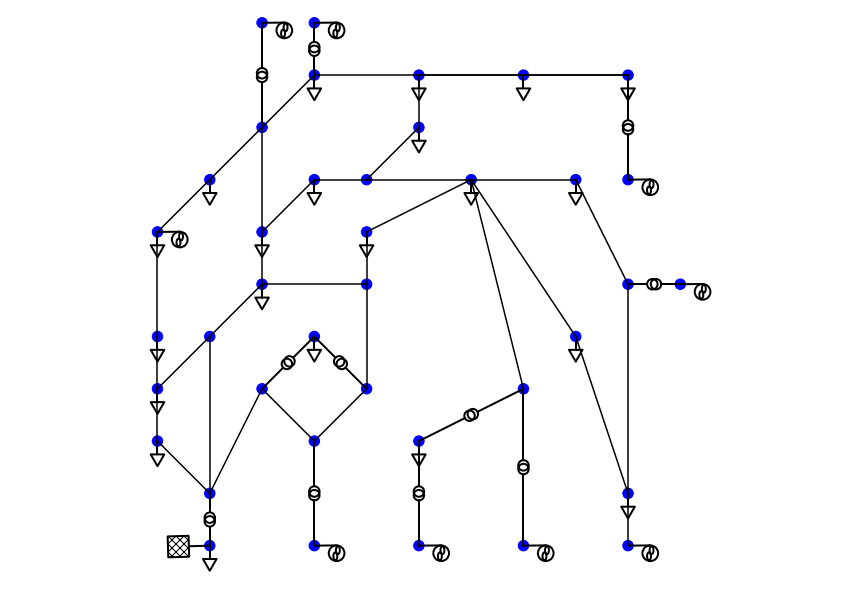

In [12]:
import pylab


def plot_grid():
    bus_col = plot.create_bus_collection(net, color="b", size=0.1, picker=True)
    trafo_col = plot.create_trafo_collection(net, size=0.1)
    line_col = plot.create_line_collection(net, color="k", use_bus_geodata=True)
    ext_grid_col = plot.create_ext_grid_collection(net, size=0.2, orientation=-1.6)
    load_col = plot.create_load_collection(net, size=0.15, orientation=np.pi)
    gen_col = plot.create_gen_collection(net, size=0.15, orientation=1.9)
    #sgen_col = plt.create_sgen_collection(net, size=0.1, infofunc=None, orientation=np.pi)
    plot.draw_collections([bus_col, trafo_col, line_col,
                          ext_grid_col, load_col, gen_col], figsize=(12, 8.5))
    pylab.show()

plot_grid()

# OPF

In [14]:
pp.runopp(net)

Pg_0_base = net.res_ext_grid['p_mw'][0]
Pg_1_base = net.res_gen['p_mw'][0]
Pg_2_base = net.res_gen['p_mw'][1]
Pg_3_base = net.res_gen['p_mw'][2]
Pg_4_base = net.res_gen['p_mw'][3]
Pg_5_base = net.res_gen['p_mw'][4]
Pg_6_base = net.res_gen['p_mw'][5]
Pg_7_base = net.res_gen['p_mw'][6]
Pg_8_base = net.res_gen['p_mw'][7]
Pg_9_base = net.res_gen['p_mw'][8]


Pg_base = np.concatenate([np.array(net.res_ext_grid['p_mw']), np.array(net.res_gen['p_mw'])], axis=0)


print('Pg0 base', Pg_0_base)
print('Pg1 base', Pg_1_base)
print('Pg2 base', Pg_2_base)
print('Pg3 base', Pg_3_base)
print('Pg4 base', Pg_4_base)
print('Pg5 base', Pg_5_base)
print('Pg6 base', Pg_6_base)
print('Pg7 base', Pg_7_base)
print('Pg8 base', Pg_8_base)
print('Pg9 base', Pg_9_base)

gen vm_pu > bus max_vm_pu for gens [5]. Setting bus limit for these gens.


Pg0 base 531.5069535674708
Pg1 base 511.62257181312725
Pg2 base 485.18707335162634
Pg3 base 495.3109751363228
Pg4 base 495.6409474250933
Pg5 base 496.05557837054226
Pg6 base 494.16105930361846
Pg7 base 497.58068760478403
Pg8 base 494.0716612585446
Pg9 base 536.4125667997394


In [15]:
a_gen = np.sum(Pg_base)
a_rs = np.sum(net.sgen['p_mw'])
a_load = np.sum(net.load['p_mw'])

diff = a_gen+a_rs-a_load

d = diff*100/(a_load-a_rs)
d = d/100
pro = 1+d
pro

1.0086740247507362

In [16]:
n_loads=21

# Load base
L_P_base = net.load['p_mw']
L_Q_base = net.load['q_mvar']

# RS base
RS_P_base = net.sgen['p_mw']
RS_Q_base = net.sgen['q_mvar']

# Load factor
faktor_load = L_Q_base/L_P_base
# RS factor
faktor_rs = RS_Q_base/RS_P_base


np.random.seed(123)

# Num of iteration
num_sampling = 500

# Load - Uniform random
alpha_corr = np.random.lognormal(-1, 0.1, num_sampling)

alpha_uncorr = []
for i in range(L_P_base.shape[0]):
    alp_unc = list(np.random.lognormal(1, 0.05, num_sampling))
    alpha_uncorr.append(alp_unc)
    
alpha_uncorr = np.array(alpha_uncorr)

# RS - Uniform random
beta_corr = np.random.uniform(0.2, 0.4, num_sampling)


beta_uncorr = []
for i in range(RS_P_base.shape[0]):
    beta_unc = list(np.random.lognormal(1, 0.3, num_sampling))
    beta_uncorr.append(beta_unc)
    
beta_uncorr = np.array(beta_uncorr)


# Control change
u = []
for i in range(Pg_base.shape[0]):
    u_con = list(np.random.uniform(0.8, 1.2, num_sampling))
    u.append(u_con)

u = np.array(u)

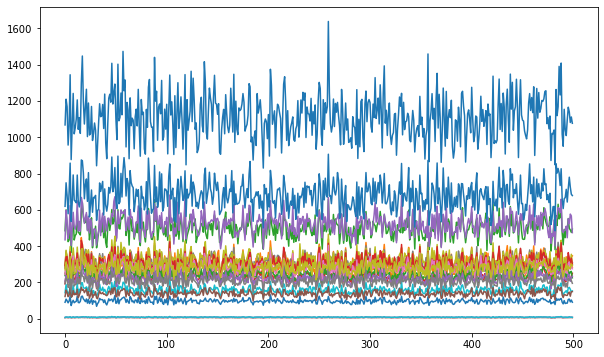

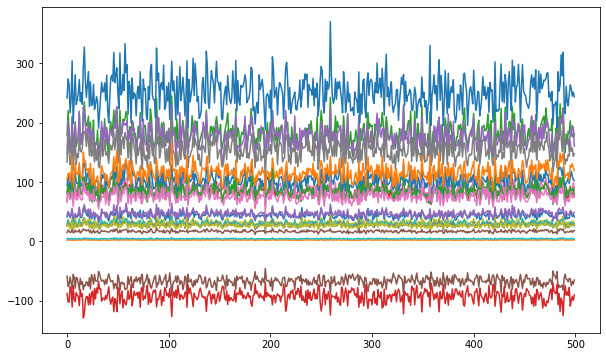

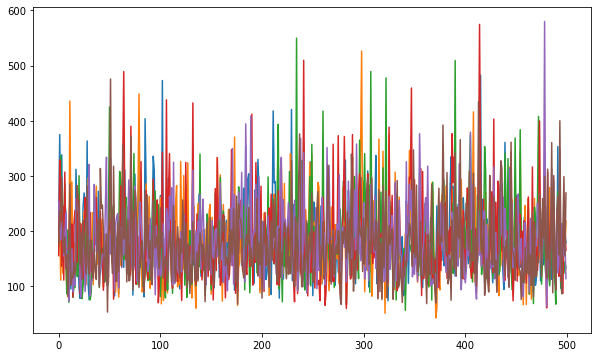

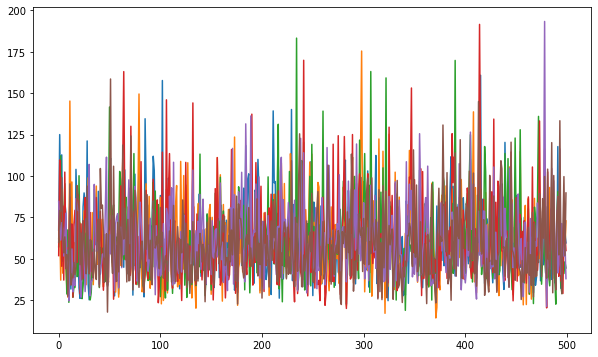

In [17]:
# Load
P_load = []
for i in range(L_P_base.shape[0]):
    load = list(L_P_base[i] * alpha_corr * alpha_uncorr[i])
    P_load.append(load)
    
P_load = np.array(P_load)

Q_load = []
for i in range(L_P_base.shape[0]):
    load = list(P_load[i] * faktor_load[i])
    Q_load.append(load)
    
Q_load = np.array(Q_load)

plt.figure(figsize=(10,6))
for i in range(P_load.shape[0]):
    plt.plot(P_load[i])
    
plt.figure(figsize=(10,6))
for i in range(Q_load.shape[0]):
    plt.plot(Q_load[i])

    
# RS    
P_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(RS_P_base[i] * beta_corr * beta_uncorr[i])
    P_rs.append(rs)
    
P_rs = np.array(P_rs)


Q_rs = []
for i in range(RS_P_base.shape[0]):
    rs = list(P_rs[i] * faktor_rs[i])
    Q_rs.append(rs)
    
Q_rs = np.array(Q_rs)

plt.figure(figsize=(10,6))
for i in range(P_rs.shape[0]):
    plt.plot(np.abs(P_rs[i]))
    
plt.figure(figsize=(10,6))
for i in range(Q_rs.shape[0]):
    plt.plot(np.abs(Q_rs[i]))

RS0 67.63667669465511 482.41642823167695
RS1 43.007454200869375 526.1858420048493
RS0 56.77335902762846 549.5991031758962
RS1 60.27185736931013 574.450653712685
RS0 63.822555885482345 579.7577014507139
RS1 53.61430543384733 475.6200173845927


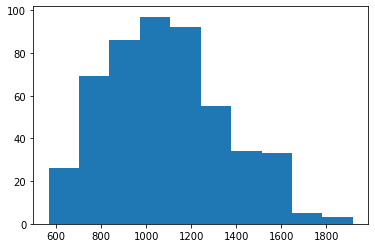

In [18]:
plt.hist(np.abs(P_rs[0]+P_rs[1]+P_rs[2]+P_rs[3]+P_rs[4]+P_rs[5]))
print('RS0',P_rs[0].min(), P_rs[0].max())
print('RS1',P_rs[1].min(), P_rs[1].max())
print('RS0',P_rs[2].min(), P_rs[2].max())
print('RS1',P_rs[3].min(), P_rs[3].max())
print('RS0',P_rs[4].min(), P_rs[4].max())
print('RS1',P_rs[5].min(), P_rs[5].max())

RS0 68.72574391230317 131.84365385683003
RS1 249.28749010223584 447.2210823793133
RS2 364.7998014724111 666.2985813415072
RS3 156.45354402385342 330.74888743674694
RS4 384.6694229278905 681.646203966321
RS5 4.446485311840517 8.972710477485752
RS6 5.710979471477585 11.413428189047975
RS19 6.487313804591685 12.70050164924781


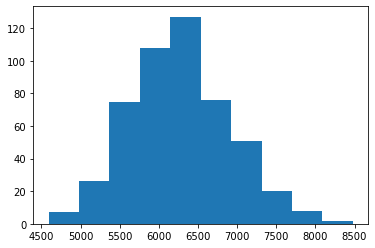

In [19]:
plt.hist(P_load[0]+P_load[1]+P_load[2]+P_load[3]+P_load[4]+P_load[5]+P_load[6]+P_load[7]+P_load[8]+P_load[9]+
         P_load[10]+P_load[11]+P_load[12]+P_load[13]+P_load[14]+P_load[15]+P_load[16]+P_load[17]+P_load[18]+P_load[19]+P_load[20])
print('RS0',P_load[0].min(), P_load[0].max())
print('RS1',P_load[1].min(), P_load[1].max())
print('RS2',P_load[2].min(), P_load[2].max())
print('RS3',P_load[3].min(), P_load[3].max())
print('RS4',P_load[4].min(), P_load[4].max())
print('RS5',P_load[5].min(), P_load[5].max())
print('RS6',P_load[6].min(), P_load[6].max())
print('RS19',P_load[19].min(), P_load[19].max())

# PF

In [30]:
n = net.gen.shape[0]

V_m = pd.DataFrame([])
V_deg = pd.DataFrame([])
P = pd.DataFrame([])
Q = pd.DataFrame([])

P_ij = pd.DataFrame([])

Pg = pd.DataFrame()
Pg_0 = pd.DataFrame()
load_p = pd.DataFrame()
load_q = pd.DataFrame()
rs_p = pd.DataFrame()
rs_q = pd.DataFrame()

P_disturbance = np.concatenate([P_load, P_rs], axis=0) 
Q_disturbance = np.concatenate([Q_load, Q_rs], axis=0)

for i in range(num_sampling):
    
    net.load['p_mw'] = pd.Series(P_load[:,i])
    net.load['q_mvar'] = pd.Series(Q_load[:,i])
    
    net.sgen['p_mw'] = pd.Series(P_rs[:,i])
    net.sgen['q_mvar'] = pd.Series(Q_rs[:,i])
    
    load_p = pd.concat([load_p, net.load['p_mw']], axis=1)
    load_q = pd.concat([load_q, net.load['q_mvar']], axis=1)
    
    rs_p = pd.concat([rs_p, net.sgen['p_mw']], axis=1)
    rs_q = pd.concat([rs_q, net.sgen['q_mvar']], axis=1)
    
    sum_load = net.load['p_mw'].sum() - net.sgen['p_mw'].sum()

    P_first = []
    for j in range(Pg_base.shape[0]):
        p = Pg_base[j] * u[j, i] * pro * (sum_load/np.sum(Pg_base))
        P_first.append(p)
    P_first = np.array(P_first)
    
    
    net.ext_grid['p_mw'] = pd.Series(P_first[0] * pro  * (sum_load/np.sum(P_first)))
    net.gen['p_mw'] = pd.Series(P_first[1:] * pro * (sum_load/np.sum(P_first)))

    
    Pg_0 = pd.concat([Pg_0, net.ext_grid['p_mw']], axis=1)
    Pg = pd.concat([Pg, net.gen['p_mw']], axis=1)    
    
    pp.runpp(net)
    
    
    V_m = V_m.append(pd.DataFrame(net.res_bus['vm_pu']).T)
    V_deg = V_deg.append(pd.DataFrame(net.res_bus['va_degree']).T)
    P = P.append(pd.DataFrame(net.res_bus['p_mw']).T)
    Q = Q.append(pd.DataFrame(net.res_bus['q_mvar']).T)
    
    P_ij = P_ij.append(pd.DataFrame(net.res_line['p_from_mw']).T)
    
    if i == (num_sampling-1):
        V_m = V_m.reset_index(drop=True)
        V_deg = V_deg.reset_index(drop=True)
        P = P.reset_index(drop=True)
        Q = Q.reset_index(drop=True)
        P_ij = P_ij.reset_index(drop=True)

# Dataset

In [31]:
load_p = load_p.transpose()
load_p = load_p.reset_index()
load_p = load_p.drop(['index'], axis=1)
load_p.columns = ['Load_P1', 'Load_P2' ,'Load_P3','Load_P4', 'Load_P5' ,'Load_P6','Load_P7', 'Load_P8' ,'Load_P9',
                  'Load_P10', 'Load_P11' ,'Load_P12','Load_P13', 'Load_P14' ,'Load_P15','Load_P16', 'Load_P17' ,'Load_P18',
                  'Load_P19' ,'Load_P20', 'Load_P21']

rs_p = rs_p.transpose()
rs_p = rs_p.reset_index()
rs_p = rs_p.drop(['index'], axis=1)
rs_p.columns = ['RS_P1', 'RS_P2', 'RS_P3', 'RS_P4', 'RS_P5', 'RS_P6']


load_q = load_q.transpose()
load_q = load_q.reset_index()
load_q = load_q.drop(['index'], axis=1)
load_q.columns = ['Load_Q1', 'Load_Q2' ,'Load_Q3','Load_Q4', 'Load_Q5' ,'Load_Q6','Load_Q7', 'Load_Q8' ,'Load_Q9',
                  'Load_Q10', 'Load_Q11' ,'Load_Q12','Load_Q13', 'Load_Q14' ,'Load_Q15','Load_Q16', 'Load_Q17' ,'Load_Q18',
                  'Load_Q19' ,'Load_Q20', 'Load_Q21']

rs_q = rs_q.transpose()
rs_q = rs_q.reset_index()
rs_q = rs_q.drop(['index'], axis=1)
rs_q.columns = ['RS_Q1', 'RS_Q2', 'RS_Q3', 'RS_Q4', 'RS_Q5', 'RS_Q6']

In [32]:
Pg0 = pd.DataFrame(Pg_0.iloc[0])
Pg1 = pd.DataFrame(Pg.iloc[0])
Pg2 = pd.DataFrame(Pg.iloc[1])
Pg3 = pd.DataFrame(Pg.iloc[2])
Pg4 = pd.DataFrame(Pg.iloc[3])
Pg5 = pd.DataFrame(Pg.iloc[4])
Pg6 = pd.DataFrame(Pg.iloc[5])
Pg7 = pd.DataFrame(Pg.iloc[6])
Pg8 = pd.DataFrame(Pg.iloc[7])
Pg9 = pd.DataFrame(Pg.iloc[8])

Pg0 = Pg0.reset_index()
Pg0 = Pg0.drop(['index'], axis=1)
Pg0.columns = ['Pg0']

Pg1 = Pg1.reset_index()
Pg1 = Pg1.drop(['index'], axis=1)
Pg1.columns = ['Pg1']

Pg2 = Pg2.reset_index()
Pg2 = Pg2.drop(['index'], axis=1)
Pg2.columns = ['Pg2']

Pg3 = Pg3.reset_index()
Pg3 = Pg3.drop(['index'], axis=1)
Pg3.columns = ['Pg3']

Pg4 = Pg4.reset_index()
Pg4 = Pg4.drop(['index'], axis=1)
Pg4.columns = ['Pg4']

Pg5 = Pg5.reset_index()
Pg5 = Pg5.drop(['index'], axis=1)
Pg5.columns = ['Pg5']

Pg6 = Pg6.reset_index()
Pg6 = Pg6.drop(['index'], axis=1)
Pg6.columns = ['Pg6']

Pg7 = Pg7.reset_index()
Pg7 = Pg7.drop(['index'], axis=1)
Pg7.columns = ['Pg7']

Pg8 = Pg8.reset_index()
Pg8 = Pg8.drop(['index'], axis=1)
Pg8.columns = ['Pg8']

Pg9 = Pg9.reset_index()
Pg9 = Pg9.drop(['index'], axis=1)
Pg9.columns = ['Pg9']

In [33]:
Q = Q.iloc[:, 29:]
Q.columns = ['Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38']

V_m = V_m.iloc[:, :29]
V_m.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8','U9', 'U10', 'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18',
               'U19', 'U20', 'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27','U28']
P_ij.columns = ['P_0_1', 'P_0_38', 'P_1_2', 'P_1_24', 'P_2_3', 'P_2_17', 'P_3_4', 'P_3_13', 'P_4_5', 'P_4_7', 'P_5_6', 'P_5_10', 'P_6_7',
                'P_7_8', 'P_8_38', 'P_9_10', 'P_9_12', 'P_12_13', 'P_13_14', 'P_14_15', 'P_15_16', 'P_15_18', 'P_15_20', 'P_15_23', 'P_16_17', 'P_16_26',
                'P_20_21', 'P_21_22','P_22_23', 'P_22_35', 'P_24_25', 'P_25_26', 'P_25_27', 'P_25_28', 'P_27_28']

In [34]:
df = pd.concat([Pg0, Pg1, Pg2, Pg3, Pg4, Pg5, Pg6, Pg7, Pg8, Pg9, load_p, load_q, rs_p, rs_q, Q, V_m, P_ij], axis=1)

In [36]:
pd.set_option('display.max_columns', 200)
df.head(5)

,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
0,543.683861,480.780962,422.589181,515.193702,465.726434,398.126985,407.492184,438.353382,470.090281,474.440983,90.914192,278.257547,484.890806,191.941725,434.717963,5.701385,7.723471,280.393552,294.915708,144.022588,619.300718,248.616210,237.842081,292.766489,207.294727,122.702763,244.951684,195.564458,269.750389,7.756971,1067.487076,41.172206,2.073969,178.439817,68.961099,147.071250,-58.417271,79.679422,134.063167,28.953731,27.346061,93.805844,104.346220,81.298748,-87.469444,43.679960,15.006813,65.814420,26.201840,25.595363,3.878486,241.731675,201.939244,186.743432,171.992000,155.919662,253.889380,180.249926,67.313081,62.247811,57.330667,51.973221,84.629793,60.083309,-97.245241,-125.249374,-87.828262,-26.192747,-121.630562,-63.966173,-14.113978,44.594445,119.362797,132.576888,1.036330,1.062366,1.050512,1.026598,1.025230,1.026894,1.017673,1.016540,1.041671,1.037964,1.034193,1.039224,1.037821,1.037297,1.049800,1.060694,1.059722,1.055139,1.062034,0.998821,1.057377,1.068149,1.063188,1.069653,1.065750,1.073446,1.062809,1.071468,1.069576,-446.072007,355.157815,353.544169,-123.383733,135.603873,-61.800089,-51.929770,-297.719713,-453.478557,401.526746,474.814290,-396.796605,281.551854,246.800549,239.617760,300.379826,122.209355,203.098223,-95.668618,-204.266790,288.185103,-355.725130,-235.824246,-196.241467,206.146955,81.521045,-484.849331,67.504248,236.381820,-406.757379,105.405929,163.890125,-67.209717,-114.323150,-262.947709
1,536.484387,547.951193,477.059316,470.671430,569.117091,440.880892,548.190410,603.776581,650.451261,598.786405,108.212196,366.011893,599.722807,243.260219,596.746247,7.403969,10.074933,373.254003,377.338547,188.271444,748.880865,268.522571,280.726052,340.867608,238.451631,157.474964,305.898926,223.975171,312.723399,10.007058,1209.309080,49.005933,2.728039,220.697993,87.398881,201.887715,-75.862208,103.938349,178.462070,37.045699,35.747742,113.433425,112.701079,95.957269,-101.840549,50.245165,19.259528,82.189925,30.008324,29.672873,5.003529,273.847165,374.974885,216.516176,209.977880,328.995585,202.538118,237.571862,124.991628,72.172059,69.992627,109.665195,67.512706,79.190621,-155.705930,-196.957456,-165.711546,-70.372389,-163.112166,-102.193941,-59.125669,6.617990,71.855892,65.285740,1.026874,1.053094,1.032643,1.004095,1.005054,1.007839,0.995471,0.994056,1.036013,1.022229,1.016963,1.018713,1.020679,1.017581,1.030161,1.045033,1.042669,1.037110,1.055150,0.992159,1.044897,1.063146,1.055219,1.054157,1.060358,1.059099,1.044896,1.061353,1.063054,-535.056085,426.843889,602.339887,-224.014487,277.785890,-45.866380,11.228432,-334.308754,-468.752007,479.978902,558.565468,-488.789839,313.386853,194.351398,185.732984,374.961711,102.097605,192.078070,-143.485948,-307.155271,221.121345,-284.799691,-400.004073,-221.754352,234.541353,-13.734384,-669.707577,96.846686,362.881792,-546.846719,135.478053,320.999974,-145.009345,-198.511163,-369.796724
2,474.376160,519.312942,435.221241,543.465098,471.367214,584.793955,444.998575,616.119147,425.730377,596.925906,99.077568,343.352262,500.972571,254.061595,540.522773,7.090723,9.230939,323.001731,334.107739,153.555420,678.6262

In [37]:
df.describe()

,Pg0,Pg1,Pg2,Pg3,Pg4,Pg5,Pg6,Pg7,Pg8,Pg9,Load_P1,Load_P2,Load_P3,Load_P4,Load_P5,Load_P6,Load_P7,Load_P8,Load_P9,Load_P10,Load_P11,Load_P12,Load_P13,Load_P14,Load_P15,Load_P16,Load_P17,Load_P18,Load_P19,Load_P20,Load_P21,Load_Q1,Load_Q2,Load_Q3,Load_Q4,Load_Q5,Load_Q6,Load_Q7,Load_Q8,Load_Q9,Load_Q10,Load_Q11,Load_Q12,Load_Q13,Load_Q14,Load_Q15,Load_Q16,Load_Q17,Load_Q18,Load_Q19,Load_Q20,Load_Q21,RS_P1,RS_P2,RS_P3,RS_P4,RS_P5,RS_P6,RS_Q1,RS_Q2,RS_Q3,RS_Q4,RS_Q5,RS_Q6,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,U10,U11,U12,U13,U14,U15,U16,U17,U18,U19,U20,U21,U22,U23,U24,U25,U26,U27,U28,P_0_1,P_0_38,P_1_2,P_1_24,P_2_3,P_2_17,P_3_4,P_3_13,P_4_5,P_4_7,P_5_6,P_5_10,P_6_7,P_7_8,P_8_38,P_9_10,P_9_12,P_12_13,P_13_14,P_14_15,P_15_16,P_15_18,P_15_20,P_15_23,P_16_17,P_16_26,P_20_21,P_21_22,P_22_23,P_22_35,P_24_25,P_25_26,P_25_27,P_25_28,P_27_28
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,550.272309,529.972943,507.509598,514.919115,512.809903,517.409604,516.063560,511.371020,514.683172,555.209822,97.642640,323.536771,499.921031,234.820984,522.422512,6.535098,8.580911,321.833408,330.563879,158.205702,681.584808,275.702305,247.972927,309.854509,223.367374,139.313320,282.688639,206.223332,283.952065,9.237151,1111.336266,44.219310,2.411454,183.970939,84.366821,176.742942,-66.959615,88.525222,153.876598,32.453536,30.039057,103.240052,115.714471,84.761655,-92.574808,47.066697,17.038320,75.953709,27.629922,26.942894,4.618576,251.661292,181.184842,183.585544,182.693730,184.384596,181.098526,177.104283,60.394947,61.195181,60.897910,61.461532,60.366175,59.034761,-139.486539,-170.061279,-141.401523,-60.922717,-148.111223,-118.976426,-54.849748,16.896003,91.149968,106.074780,1.032878,1.055806,1.040182,1.014643,1.013469,1.015605,1.004368,1.003255,1.038037,1.028384,1.023756,1.026394,1.027411,1.025605,1.036510,1.048775,1.048057,1.043726,1.056821,0.994522,1.046105,1.061558,1.055652,1.056771,1.060881,1.064717,1.051518,1.065736,1.065416,-449.822569,352.179929,408.626342,-154.085127,150.815266,-67.837012,-28.138791,-321.435721,-473.846771,445.683957,528.680983,-461.227207,292.145769,213.448618,205.571257,365.267819,142.241779,218.882955,-103.837665,-243.251816,322.752700,-339.497403,-351.550669,-206.172118,226.468971,95.567792,-628.206544,70.616878,337.419211,-514.833970,130.388971,187.830525,-73.902909,-123.428467,-280.394544
std,97.737435,95.930804,90.230670,86.946043,92.483111,89.530007,87.363869,89.303999,88.222052,93.223187,11.021646,34.641240,54.068551,25.722979,56.683

# Save

In [29]:
df.to_csv(module_path + '\\IEEE39\\datasets\\dataset_pandapower_AC.csv')